In [1]:
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
import matplotlib.pyplot as plt

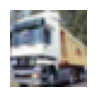

In [6]:
plt.figure(figsize=(1, 1))
plt.imshow(x_train[1])
plt.axis("off")
plt.show()

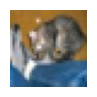

In [7]:
plt.figure(figsize=(1, 1))
plt.imshow(x_test[0])
plt.axis("off")
plt.show()

In [8]:
#label
print(y_test[0])

[3]


In [9]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [10]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input,Dropout, BatchNormalization
from keras.utils import to_categorical
import numpy as np

## Data preperation

In [11]:
# print(x_train[0])

In [12]:
x_train = x_train.astype('float32')/255


In [13]:
x_test = x_test.astype('float32')/255

# One hot encode labels

In [14]:
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

In [15]:
y_train_categorical[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

# Build a Sequential ANN using **Tensorflow**

In [16]:
x_train.shape

(50000, 32, 32, 3)

In [17]:
x_train.shape[1:]

(32, 32, 3)

In [18]:
model1 = Sequential([
    Input(shape=x_train.shape[1:]),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(128, activation = 'relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')

])

In [19]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,640,330 (6.26 MB)

 Trainable params: 1,640,330 (6.26 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training model

In [21]:
history1 = model1.fit(x_train, y_train_categorical, epochs=50, validation_split=0.2)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1860 - loss: 2.1956 - val_accuracy: 0.2924 - val_loss: 1.9350
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2769 - loss: 1.9603 - val_accuracy: 0.3099 - val_loss: 1.9188
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2771 - loss: 1.9418 - val_accuracy: 0.3220 - val_loss: 1.9249
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2902 - loss: 1.9147 - val_accuracy: 0.3439 - val_loss: 1.8519
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3004 - loss: 1.8991 - val_accuracy: 0.3321 - val_loss: 1.8708
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3073 - loss: 1.8929 - val_accuracy: 0.3546 - val_loss: 1.8745
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3102 - loss: 1.8909 - val_accuracy: 0.3627 - val_loss: 1.8520
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3072 - loss: 1.8750 - 

In [22]:
# history1.history['accuracy']

Text(0.5, 0, 'epoch')

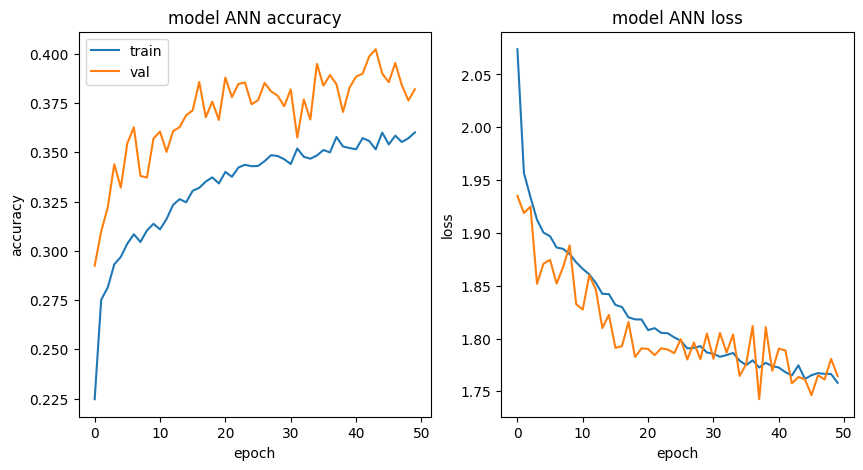

In [23]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model ANN accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model ANN loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [24]:
[x_test[0]]

[array([[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],
 
        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],
 
        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],
 
        ...,
 
        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.58039

In [25]:
#prediction
print(model1.predict(np.array([x_test[0]])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
[[0.05424266 0.03593196 0.09748039 0.23466438 0.10175044 0.20105948
  0.1197057  0.05622743 0.07480229 0.02413527]]


In [26]:
print(np.argmax(model1.predict(np.array([x_test[0]]))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3


In [27]:
model1.predict(np.array([x_test[2]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[0.14333178, 0.21024843, 0.04634537, 0.02258575, 0.02073545,
        0.01162263, 0.00504423, 0.02926677, 0.26234147, 0.24847811]],
      dtype=float32)

In [28]:
print(np.argmax(model1.predict(np.array([x_test[2]]))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
8


In [29]:
y_pred = model1.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [30]:
y_pred[:5]

array([[0.05424266, 0.03593195, 0.0974804 , 0.23466441, 0.10175043,
        0.20105949, 0.11970571, 0.05622742, 0.07480228, 0.02413527],
       [0.03675927, 0.36629117, 0.00667331, 0.00508116, 0.00178185,
        0.00103729, 0.00118669, 0.00293079, 0.15792465, 0.42033383],
       [0.14333177, 0.21024852, 0.04634534, 0.02258575, 0.02073543,
        0.01162262, 0.00504422, 0.02926676, 0.26234144, 0.24847813],
       [0.13373712, 0.10951149, 0.10671633, 0.07034178, 0.08775035,
        0.05063895, 0.03518376, 0.07479224, 0.16928056, 0.16204737],
       [0.01192807, 0.00452289, 0.22946899, 0.0511773 , 0.33907786,
        0.09763969, 0.15608187, 0.101939  , 0.00238612, 0.00577811]],
      dtype=float32)

In [31]:
y_out = np.argmax(y_pred, axis=1)

In [32]:
y_out[:5]

array([3, 9, 8, 8, 4])

In [33]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test, y_out))

              precision    recall  f1-score   support

           0       0.64      0.23      0.34      1000
           1       0.63      0.41      0.49      1000
           2       0.27      0.02      0.04      1000
           3       0.25      0.27      0.26      1000
           4       0.28      0.56      0.37      1000
           5       0.40      0.24      0.30      1000
           6       0.40      0.48      0.44      1000
           7       0.39      0.53      0.45      1000
           8       0.52      0.44      0.48      1000
           9       0.36      0.66      0.46      1000

    accuracy                           0.38     10000
   macro avg       0.41      0.38      0.36     10000
weighted avg       0.41      0.38      0.36     10000

